In [76]:
import pandas as pd 
#%pip install langchain_groq
from langchain_groq.chat_models import ChatGroq
import pandas as pd
import numpy as np
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import ast
import time
import matplotlib.pyplot as plt

In [78]:
# Groq API and Models 
Groq_Token = open('..\\groqapi.txt', 'r').read().split("\n")[0]  # Do not share this key with anyone
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

# Data structuring

In [3]:
# Loading the data
f = open(".\\UCI HAR Dataset\\features.txt", 'r').read().split('\n')
feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',sep = '\\s+',header=None)
train_dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',sep = '\\s+',header=None)
train_dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',sep = '\\s+',header=None)
test_dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/test/X_test.txt',sep = '\\s+',header=None)
test_dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/test/y_test.txt',sep = '\\s+',header=None)
correlation_matrix = train_dataframeX.corr()

In [4]:
print("Feature labels"); display(feature_labels)
print("train_DataframeX"); display(train_dataframeX)
print("train_DataframeY");display(train_dataframeY)
print("test_DataframeX");display(test_dataframeX)
print("test_DataframeY");display(test_dataframeY)
print("correlation_matrix"); display(correlation_matrix)

Feature labels


,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


train_DataframeX


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


train_DataframeY


,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


test_DataframeX


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


test_DataframeY


,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


correlation_matrix


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
1,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
2,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
3,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
4,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
557,0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
558,-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
559,0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


 There are 561 features in this dataset. Some of these features might be highly correlated. Additionally, LLMs have a limited context window size, and we therefore need to restrict the number of features we pass in the query. Therefore, we can provide it the list of all features and expect it to tell us the most important features which can be used for classifying. 

In [5]:
feature_names = feature_labels[1].values
print(len(feature_names))
print(feature_names[:10])

561
['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X']


Passing these features as query to an LLM and telling it to extract the most useful ones.

In [6]:
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* The data features are: {feature_names}.
* There are, as you can see, 561 features. Infer the most important features out of these which can be used for classification.
* Provide the answer in the form of a python list of important feature names.
* DO NOT provide any python code, I only want the final list.
"""
model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary. I am choosing the most powerful model.
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
cleaned_answer = llm.invoke(f"Extract and output the python list from the text provided. Do not say anthing else: \n {answer.content}")
print(answer.content)
print(cleaned_answer.content)
important_features = ast.literal_eval(cleaned_answer.content)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 
'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 
'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 
'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 
'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 
'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 
'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 
'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 
'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 
'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 
'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-mad()', 
'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 
'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)']
[

In [7]:
print(len(important_features))

40


Now, we can reduce the DatasetX down from 561 features to 40. This will enable us to fit the data into the context size of the LLM.
Let us first replace the column numbers of dataframeX with their corresponding feature names.

In [8]:
#features = np.array(feature_labels[1].iloc[frs])
activity_dic = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}
def label(n):
    #print(dataframeY.iloc[n, 0])
    return (activity_dic[train_dataframeY.iloc[n, 0]])
print(label(100))

WALKING


In [9]:
train_dataframeX = train_dataframeX.rename(columns={i:feature_names[i] for i in range(len(feature_names))})
test_dataframeX = test_dataframeX.rename(columns={i:feature_names[i] for i in range(len(feature_names))})
train_dataframeY = train_dataframeY.rename(columns={0: "Activity"})
test_dataframeY = test_dataframeY.rename(columns={0: "Activity"})
train_dataframeY = train_dataframeY.replace(activity_dic)
test_dataframeY = test_dataframeY.replace(activity_dic)
reduced_test = test_dataframeX[important_features]
reduced_train = train_dataframeX[important_features]
master_train = pd.concat([reduced_train,train_dataframeY],axis=1).round(2)
master_test = pd.concat([reduced_test,test_dataframeY],axis=1).round(2)
#Drop the index column from master_train
#    
display(master_train)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,...,tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-std(),tBodyGyroJerkMag-mad(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
0,0.29,-0.02,-0.13,-1.00,-0.98,-0.91,0.08,0.01,-0.07,-0.99,...,-0.96,-0.96,-0.99,-0.99,-0.99,-0.11,0.03,-0.46,-0.02,STANDING
1,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,0.07,0.01,0.03,-1.00,...,-0.98,-0.98,-1.00,-1.00,-1.00,0.05,-0.01,-0.73,0.70,STANDING
2,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,0.07,0.00,-0.01,-0.99,...,-0.99,-0.98,-0.99,-1.00,-0.99,-0.12,0.18,0.10,0.81,STANDING
3,0.28,-0.03,-0.12,-1.00,-0.98,-0.99,0.08,0.02,-0.01,-0.99,...,-0.99,-0.99,-1.00,-1.00,-1.00,-0.04,-0.01,0.64,-0.49,STANDING
4,0.28,-0.02,-0.12,-1.00,-0.98,-0.99,0.07,0.02,0.02,-1.00,...,-0.99,-0.99,-1.00,-1.00,-1.00,0.12,0.12,0.69,-0.62,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.30,-0.06,-0.18,-0.20,0.04,0.08,-0.32,0.11,-0.17,-0.30,...,-0.11,-0.01,-0.59,-0.69,-0.70,-0.19,0.83,0.21,-0.43,WALKING_UPSTAIRS
7348,0.27,-0.01,-0.15,-0.24,0.00,0.06,-0.42,0.36,0.05,-0.35,...,-0.17,-0.02,-0.61,-0.71,-0.72,0.06,0.88,-0.88,0.40,WALKING_UPSTAIRS
7349,0.27,-0.02,-0.05,-0.22,-0.10,0.27,0.10,-0.14,-0.03,-0.35,...,-0.05,0.05,-0.62,-0.69,-0.71,0.05,-0.27,0.86,0.70,WALKING_UPSTAIRS
7350,0.29,-0.02,-0.16,-0.22,-0.11,0.27,-0.03,-0.03,-0.03,-0.39,...,-0.01,0.02,-0.64,-0.69,-0.71,-0.10,0.70,0.94,-0.59,WALKING_UPSTAIRS


In [10]:
train_list = [master_train[master_train["Activity"]==activity].reset_index(drop=True) for activity in activity_dic.values()]
test_list = [master_test[master_test["Activity"]==activity].reset_index(drop=True) for activity in activity_dic.values()]

Now that we have the train and test datasets ready, we are ready to try zero shot and few shot learning on LLMs.

In [11]:
print(f"{test_list[0].columns[:-1].to_list()}")

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-mad()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)']


In [12]:
print(f"{test_list[0].iloc[0, :-1].values}")

[0.2 -0.03 -0.1 -0.47 -0.18 -0.46 -0.08 0.2 0.18 -0.37 -0.19 -0.68 -0.28
 0.23 0.08 -0.61 -0.54 -0.5 -0.06 -0.2 0.12 -0.54 -0.74 -0.56 -0.36 -0.44
 -0.5 -0.39 -0.32 -0.34 -0.42 -0.55 -0.48 -0.65 -0.71 -0.71 0.48 0.62 0.89
 -0.31]


In [13]:
np.random.seed(0)
train_list[0]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,...,tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-std(),tBodyGyroJerkMag-mad(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
0,0.28,-0.04,-0.13,-0.33,-0.14,-0.19,-0.16,-0.14,-0.11,-0.18,...,-0.17,-0.06,-0.47,-0.43,-0.48,-0.16,0.56,0.91,-0.41,WALKING
1,0.26,-0.06,-0.10,-0.23,0.02,-0.26,-0.21,0.36,-0.45,-0.11,...,-0.22,-0.08,-0.39,-0.44,-0.48,-0.02,0.51,-0.70,-0.84,WALKING
2,0.25,0.00,-0.12,-0.28,0.01,-0.28,0.20,0.42,0.14,-0.18,...,-0.29,-0.19,-0.37,-0.42,-0.48,0.37,-0.11,-0.92,0.34,WALKING
3,0.34,-0.01,-0.17,-0.23,0.17,-0.21,0.34,-0.46,-0.01,-0.12,...,-0.09,-0.01,-0.24,-0.23,-0.31,-0.38,-0.58,-0.89,0.06,WALKING
4,0.28,-0.03,-0.14,-0.23,0.16,-0.12,-0.24,-0.11,0.17,-0.19,...,-0.04,0.08,-0.22,-0.21,-0.29,-0.07,0.66,-0.29,0.08,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0.37,-0.04,-0.17,-0.29,-0.11,-0.01,0.09,0.07,0.23,-0.39,...,-0.20,-0.05,-0.38,-0.47,-0.49,-0.44,-0.04,0.52,0.26,WALKING
1222,0.28,-0.03,-0.12,-0.28,-0.08,-0.07,-0.29,0.25,0.42,-0.35,...,-0.17,-0.00,-0.38,-0.52,-0.52,-0.17,0.60,0.39,0.12,WALKING
1223,0.21,-0.01,-0.07,-0.26,-0.14,-0.14,-0.29,-0.16,0.12,-0.31,...,-0.18,-0.00,-0.37,-0.49,-0.51,0.54,0.72,0.44,0.19,WALKING
1224,0.21,-0.02,-0.05,-0.28,-0.14,-0.08,0.17,-0.05,0.15,-0.32,...,-0.20,-0.07,-0.37,-0.45,-0.47,0.40,-0.53,-0.17,-0.45,WALKING


In [17]:
test_df = pd.concat([test_list[0].sample(1, random_state=42), test_list[1].sample(1, random_state=42), test_list[2].sample(1, random_state=42), test_list[3].sample(1, random_state=42), test_list[4].sample(1, random_state=42), test_list[5].sample(1, random_state=42)], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
display(test_df)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,...,tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-std(),tBodyGyroJerkMag-mad(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity
0,0.29,-0.03,-0.11,-0.48,-0.13,-0.26,-0.10,0.30,0.33,-0.51,...,-0.56,-0.51,-0.54,-0.65,-0.66,-0.23,0.46,-0.68,-0.25,WALKING
1,0.17,-0.04,-0.11,-0.39,-0.14,-0.46,0.07,-0.04,-0.04,-0.56,...,-0.46,-0.38,-0.73,-0.78,-0.79,0.58,-0.04,-0.87,0.32,WALKING_UPSTAIRS
2,0.27,-0.02,-0.10,-0.99,-0.99,-0.99,0.07,0.01,0.00,-0.99,...,-0.98,-0.97,-0.99,-0.99,-0.99,-0.15,0.16,-0.63,0.55,LAYING
3,0.21,-0.01,-0.13,0.34,0.16,-0.25,0.36,-0.25,0.32,0.22,...,-0.31,-0.27,-0.31,-0.43,-0.46,0.76,-0.60,-0.97,-0.30,WALKING_DOWNSTAIRS
4,0.28,-0.02,-0.10,-1.00,-0.98,-0.98,0.07,-0.00,-0.01,-0.99,...,-0.98,-0.98,-0.99,-0.99,-0.99,-0.31,-0.00,0.73,-0.33,STANDING
5,0.27,-0.01,-0.12,-0.99,-0.97,-0.95,0.07,0.03,0.02,-0.99,...,-0.98,-0.97,-0.99,-0.99,-0.99,0.02,0.02,0.02,0.27,SITTING


In [19]:
test_df.iloc[3, :-1].values

array([0.21, -0.01, -0.13, 0.34, 0.16, -0.25, 0.36, -0.25, 0.32, 0.22,
       -0.03, -0.31, 0.45, -0.31, 0.09, -0.49, -0.35, 0.14, 0.1, -0.32,
       -0.71, -0.38, -0.38, -0.09, 0.32, 0.12, 0.05, 0.06, 0.12, 0.1,
       -0.04, -0.31, -0.27, -0.31, -0.43, -0.46, 0.76, -0.6, -0.97, -0.3],
      dtype=object)

Q1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why? [1 marks]

# Zero shot learning

## Multiple tests in a single query
First, we will test the performance of zero shot prompting while giving multiple test queries at once. For this we will make a test dataset consisiting of equal number of samples chosen from each activity set.

In [26]:
# System Prompts
n = 1 # Number of test samples per activity
seed = 40
test_df = pd.concat([test_list[i].sample(n, random_state=seed) for i in range(6)], axis=0).sample(frac=1, random_state=seed).reset_index(drop=True)
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* Provide a single label for the activity being performed by the person for every test case.
* Provide the answer in the form of a python list of activity labels. DO NOT say anything else.
* Feature names: {test_df.columns[:-1].to_list()}
Guess the activity label for the following test samples:
"""
for i in range(len(test_df)):
    query += f"* Test sample {i+1}: {test_df.iloc[i, :-1].values}\n"
#To use Groq LLMs 
model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
predicted_activities = ast.literal_eval(answer.content)
actual_activities = test_df["Activity"].to_list()
print(accuracy_score(actual_activities, predicted_activities))
print(answer.content)

0.5
['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'WALKING_DOWNSTAIRS']


It can be seen that we are getting a good accuracy even by zero shot learning. However, this could be a lucky chance due to a good selection of random seed. Let us test some other random seeds and see if the accuracy is maintained.

In [36]:
def zero_shot_predict(test_df):
    query = f"""
    * You are a Human Activity Recognition model.
    * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
    * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
    * Provide a single label for the activity being performed by the person for every test case.
    * Provide the answer in the form of a python list of activity labels. DO NOT say anything else.
    * Feature names: {test_df.columns[:-1].to_list()}
    Guess the activity label for the following test samples:
    """
    for i in range(len(test_df)):
        query += f"* Test sample {i+1}: {test_df.iloc[i, :-1].values}\n"
    #To use Groq LLMs 
    model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)
    predicted_activities = ast.literal_eval(answer.content)
    actual_activities = test_df["Activity"].to_list()
    return (accuracy_score(actual_activities, predicted_activities)), predicted_activities
    # print(answer.content)

def make_test_df(test_list, n=1, seed=42):
    test_df = pd.concat([test_list[i].sample(n, random_state=seed) for i in range(6)], axis=0).sample(frac=1, random_state=seed).reset_index(drop=True)
    return test_df

In [30]:
acc_array = []
for seed in range(35, 45):
    test_df = make_test_df(test_list, n=1, seed=seed)
    acc = (zero_shot_predict(test_df))[0]
    time.sleep(1)
    acc_array.append(acc)
    print(f"Seed: {seed}, Accuracy: {acc}")
print(f"Mean Accuracy: {np.mean(np.array(acc_array))}")

Seed: 35, Accuracy: 0.3333333333333333
Seed: 36, Accuracy: 0.0
Seed: 37, Accuracy: 0.3333333333333333
Seed: 38, Accuracy: 0.0
Seed: 39, Accuracy: 0.16666666666666666
Seed: 40, Accuracy: 0.16666666666666666
Seed: 41, Accuracy: 0.3333333333333333
Seed: 42, Accuracy: 0.5
Seed: 43, Accuracy: 0.16666666666666666
Seed: 44, Accuracy: 0.16666666666666666
Mean Accuracy: 0.21666666666666665


It can be seen that the mean accuracy is abysmal, just a little better than random prediction. Random prediction would have yielded an accuracy of around 0.16. Now, let us also test increasing n, i.e, the number of test examples.

In [31]:
acc_array = []
for seed in range(35, 45):
    test_df = make_test_df(test_list, n=2, seed=seed)
    acc = (zero_shot_predict(test_df))[0]
    time.sleep(1)
    acc_array.append(acc)
    print(f"Seed: {seed}, Accuracy: {acc}")
print(f"Mean Accuracy: {np.mean(np.array(acc_array))}")

Seed: 35, Accuracy: 0.16666666666666666
Seed: 36, Accuracy: 0.16666666666666666
Seed: 37, Accuracy: 0.08333333333333333
Seed: 38, Accuracy: 0.08333333333333333
Seed: 39, Accuracy: 0.3333333333333333
Seed: 40, Accuracy: 0.16666666666666666
Seed: 41, Accuracy: 0.08333333333333333
Seed: 42, Accuracy: 0.0
Seed: 43, Accuracy: 0.16666666666666666
Seed: 44, Accuracy: 0.25
Mean Accuracy: 0.15000000000000002


It can be seen that the average acccuracy for n=2 is even worse than random chance.

Now, let us try giving only one test sample per prediction and see the accuracy. Here, the order in which queries are given does not matter. We will give one query per activity, i.e. 6 queries.

## One test per query

In [37]:
acc_array = []
for i in range(6):
    test_df = test_list[i].sample(1, random_state=42)
    acc, pred = (zero_shot_predict(test_df))
    time.sleep(1)
    acc_array.append(acc)
    print(f"Activity: {activity_dic[i+1]}, Prediction: {pred[0]} Accuracy: {acc}")
print(f"Mean Accuracy: {np.mean(np.array(acc_array))}")

Activity: WALKING, Prediction: WALKING Accuracy: 1.0
Activity: WALKING_UPSTAIRS, Prediction: WALKING Accuracy: 0.0
Activity: WALKING_DOWNSTAIRS, Prediction: WALKING Accuracy: 0.0
Activity: SITTING, Prediction: WALKING Accuracy: 0.0
Activity: STANDING, Prediction: WALKING Accuracy: 0.0
Activity: LAYING, Prediction: WALKING Accuracy: 0.0
Mean Accuracy: 0.16666666666666666


It can be seen that if examples are individually fed into every query, the LLM thinks every activity is walking.

# Few shot learning

Now, let us try using few-shot learning for activity prediction. In few shot learning, we provide the LLM with a few labelled examples in the query. The LLM is expected to infer from these labelled examples and more accurately predict the class of the test query.

In [61]:
def few_shot_predict(train_df, test_df):
    query = f"""
    * You are a Human Activity Recognition model.
    * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
    * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
    * Provide a single label for the activity being performed by the person for every test case.
    * Provide the answer in the form of a python list of activity labels. DO NOT say anything else.
    * Feature names: {test_df.columns[:-1].to_list()}
    Look at the following training data:
    """
    for i in range(len(train_df)):
        query += f"* Train sample {i+1}: {train_df.iloc[i, :-1].values}\n"
        query += f"* Activity {i+1}: {train_df.iloc[i, -1]}\n"
    query += "* Guess the activity label for the following test samples:\n"
    query += f"* Feature names: {test_df.columns[:-1].to_list()}"
    for i in range(len(test_df)):
        query += f"* Test sample {i+1}: {test_df.iloc[i, :-1].values}\n"
    query += f"* Provide the answer in the form of a python list of activity labels. Remember, there should be {len(test_df)} activity labels in this list. DO NOT say anything else."
    #To use Groq LLMs 
    model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)
    predicted_activities = ast.literal_eval(answer.content)
    actual_activities = test_df["Activity"].to_list()
    return (accuracy_score(actual_activities, predicted_activities)), predicted_activities
    # print(answer.content)

def make_train_df(train_list, n=1, seed=42):
    train_df = pd.concat([train_list[i].sample(n, random_state=seed) for i in range(6)], axis=0).reset_index(drop=True)
    return train_df

In [65]:
accarr = []

Few shot learning with training data in shuffled format:

In [69]:
for i in range(1, 11):
    train_df = make_train_df(train_list, n=i, seed=42).sample(frac=1, random_state=43).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    acc, pred = few_shot_predict(train_df, test_df)
    print(f"Training samples: {i}, Accuracy: {acc}, Prediction: {pred}")
    accarr.append(acc)
    time.sleep(1)

Training samples: 1, Accuracy: 0.25, Prediction: ['LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYING']
Training samples: 2, Accuracy: 0.4166666666666667, Prediction: ['STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING']
Training samples: 3, Accuracy: 0.16666666666666666, Prediction: ['STANDING', 'LAYING', 'WALKING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'SITTING', 'STANDING']
Training samples: 4, Accuracy: 0.25, Prediction: ['LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']
Training samples: 5, Accuracy: 0.25, Prediction: ['LAYI

In [80]:
for i in range(11, 15):
    train_df = make_train_df(train_list, n=i, seed=42).sample(frac=1, random_state=43).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    acc, pred = few_shot_predict(train_df, test_df)
    print(f"Training samples: {i}, Accuracy: {acc}, Prediction: {pred}")
    accarr.append(acc)
    time.sleep(1)

Training samples: 11, Accuracy: 0.4166666666666667, Prediction: ['STANDING', 'STANDING', 'WALKING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING']
Training samples: 12, Accuracy: 0.5, Prediction: ['LAYING', 'LAYING', 'WALKING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING']
Training samples: 13, Accuracy: 0.5, Prediction: ['LAYING', 'STANDING', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'LAYING']
Training samples: 14, Accuracy: 0.4166666666666667, Prediction: ['LAYING', 'LAYING', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING']


In [83]:
for i in range(15, 20):
    train_df = make_train_df(train_list, n=i, seed=42).sample(frac=1, random_state=43).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    acc, pred = few_shot_predict(train_df, test_df)
    print(f"Training samples: {i}, Accuracy: {acc}, Prediction: {pred}")
    accarr.append(acc)
    time.sleep(1)

Training samples: 15, Accuracy: 0.4166666666666667, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYING']
Training samples: 16, Accuracy: 0.4166666666666667, Prediction: ['LAYING', 'SITTING', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING', 'STANDING']
Training samples: 17, Accuracy: 0.5, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYING']
Training samples: 18, Accuracy: 0.5833333333333334, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'LAYING']
Training samples: 19, Accuracy: 0.4166666666666667, Prediction: ['LAYING', 'LAYING', 'WALKING'

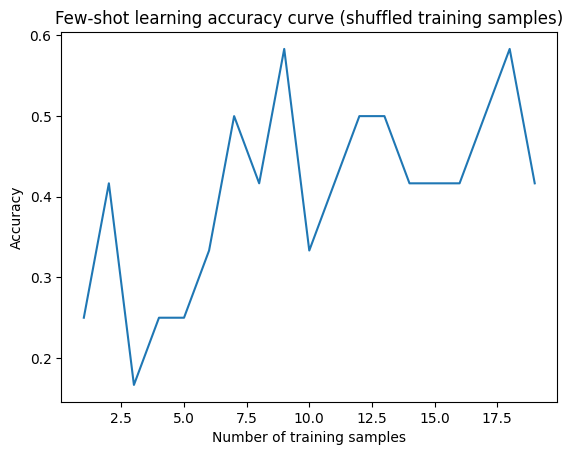

In [109]:
plt.plot(range(1, 20), accarr)
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Few-shot learning accuracy curve (shuffled training samples)")
plt.show()

Few shot learning with ordered training data:

In [89]:
newaccarr = []

In [90]:
for i in range(1, 16):
    train_df = make_train_df(train_list, n=i, seed=42).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    acc, pred = few_shot_predict(train_df, test_df)
    print(f"Training samples: {i}, Accuracy: {acc}, Prediction: {pred}")
    newaccarr.append(acc)
    time.sleep(1)

Training samples: 1, Accuracy: 0.3333333333333333, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING', 'WALKING', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYING']
Training samples: 2, Accuracy: 0.25, Prediction: ['LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_UPSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS', 'LAYING']
Training samples: 3, Accuracy: 0.3333333333333333, Prediction: ['LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS', 'LAYING']
Training samples: 4, Accuracy: 0.16666666666666666, Prediction: ['STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING']
Training samples: 5, Accuracy: 0.41666666666666

In [104]:
for i in range(16, 20):
    train_df = make_train_df(train_list, n=i, seed=42).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    acc, pred = few_shot_predict(train_df, test_df)
    print(f"Training samples: {i}, Accuracy: {acc}, Prediction: {pred}")
    newaccarr.append(acc)
    time.sleep(1)

Training samples: 16, Accuracy: 0.3333333333333333, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']
Training samples: 17, Accuracy: 0.4166666666666667, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']
Training samples: 18, Accuracy: 0.25, Prediction: ['LAYING', 'LAYING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING']
Training samples: 19, Accuracy: 0.3333333333333333, Prediction: ['LAYING', 'LAYING', 'WALKING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYIN

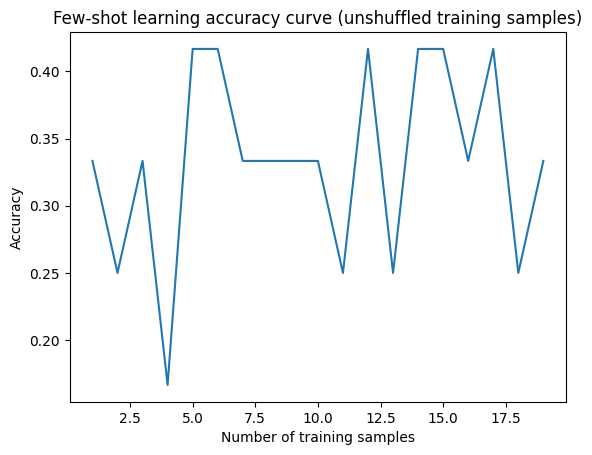

In [110]:
plt.plot(range(1, 20), newaccarr)
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Few-shot learning accuracy curve (unshuffled training samples)")
plt.show()

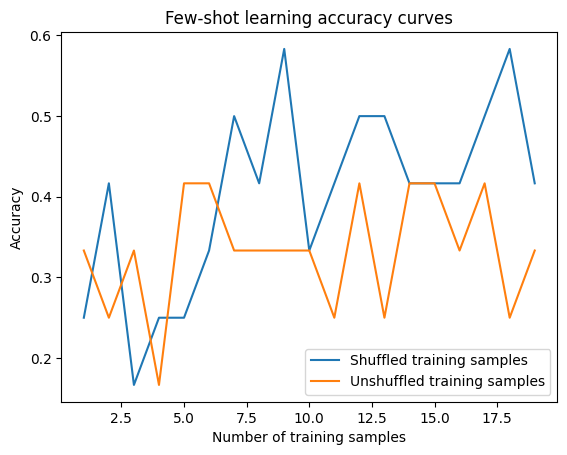

In [112]:
plt.plot(range(1, 20), accarr, label="Shuffled training samples")
plt.plot(range(1, 20), newaccarr, label="Unshuffled training samples")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Few-shot learning accuracy curves")
plt.legend()
plt.show()

In [111]:
print(np.mean(accarr))
print(np.mean(newaccarr))

0.4035087719298246
0.3333333333333333


###### It can therefore, be clearly seen that few-shot learning has a much better prediction rate (mean 40%) as compared to the prediction rates of zero-shot learing (mean 20%). It can also be seen that random shuffling of the training data can be useful for increasing the accuracy of test predictions. (40% vs 33%)
###### Few-shot learning works better than zero shot learning because it provides the model with specific examples which help it understand the task at hand and makes it easier for the model to learn the nuances of the data. Additionally, in zero shot learning, the model has to rely on it's domain knowledge, which may not be accurate for nuanced tasks like these. The dataset here has also been scaled and normalized, further adding to its woes.

Q2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why? [1 marks]

###### A2. For the purpose of comparing the accuracy of few-shot learning and decision trees, for obtaining a fair comparision, we will be using the same train and test datasets. As we have already computed the accuracy scores for the few-shot, we will not do it again. Instead, for each train size, we will train the decision tree on the same train and test set that was generated for prompting the LLM.

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [265]:
tree_accarr = []
for i in range(1, 20):
    train_df = make_train_df(train_list, n=i, seed=42).sample(frac=1, random_state=43).reset_index(drop=True)
    test_df = make_test_df(test_list, n=2, seed=42)
    X_train = train_df.drop('Activity', axis=1)
    Y_train = train_df['Activity']
    X_test = test_df.drop('Activity', axis=1)
    Y_test = test_df['Activity']
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    print(f"Training samples: {i}, Accuracy: {acc}")
    tree_accarr.append(acc)
    #time.sleep(1)

Training samples: 1, Accuracy: 0.4166666666666667
Training samples: 2, Accuracy: 0.5833333333333334
Training samples: 3, Accuracy: 0.5833333333333334
Training samples: 4, Accuracy: 0.5
Training samples: 5, Accuracy: 0.3333333333333333
Training samples: 6, Accuracy: 0.5
Training samples: 7, Accuracy: 0.5833333333333334
Training samples: 8, Accuracy: 0.5833333333333334
Training samples: 9, Accuracy: 0.5833333333333334
Training samples: 10, Accuracy: 0.5
Training samples: 11, Accuracy: 0.5
Training samples: 12, Accuracy: 0.5833333333333334
Training samples: 13, Accuracy: 0.4166666666666667
Training samples: 14, Accuracy: 0.6666666666666666
Training samples: 15, Accuracy: 0.5833333333333334
Training samples: 16, Accuracy: 0.6666666666666666
Training samples: 17, Accuracy: 0.5
Training samples: 18, Accuracy: 0.5833333333333334
Training samples: 19, Accuracy: 0.5


In [266]:
np.mean(tree_accarr)

0.5350877192982457

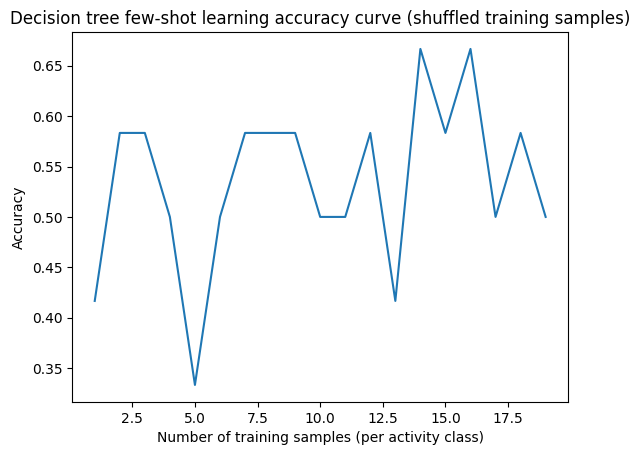

In [269]:
plt.plot(range(1, 20), tree_accarr)
plt.xlabel("Number of training samples (per activity class)")
plt.ylabel("Accuracy")
plt.title("Decision tree few-shot learning accuracy curve (shuffled training samples)")
plt.show()

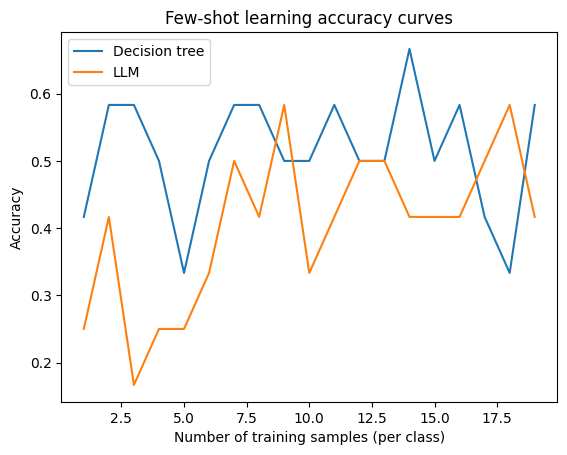

In [178]:
plt.plot(range(1, 20), tree_accarr, label="Decision tree")
plt.plot(range(1, 20), accarr, label="LLM")
plt.xlabel("Number of training samples (per class)")
plt.ylabel("Accuracy")
plt.title("Few-shot learning accuracy curves")
plt.legend()
plt.show()

###### It can therefore be seen that the accuracy obtained using a decision tree is comparable to that obtained by using an LLM, atleast when the number of training samples per class is small. The mean accuracy over the number of training samples obtained by using a decision tree here is around 53%. This is slightly better than using few-shot learning, which is around 40%. The reason using decision trees works better is that calculation decision trees involves complicated mathematics, an ability that Large Language models currently lack. Additionally, decision trees are more specialized tools, made specifically to classify objects. On the other hand, LLMs are more general purpose tools, which is why they might not fare well against tools which have been developed to tackle a specific problem.

##### Making a decision tree on the whole training data and testing it on the whole test data.

In [273]:
big_tree_accarr = []
for i in range(1, 986):
    train_df = make_train_df(train_list, n=i, seed=42).sample(frac=1, random_state=43).reset_index(drop=True)
    test_df = make_test_df(test_list, n=420, seed=42)
    X_train = train_df.drop('Activity', axis=1)
    Y_train = train_df['Activity']
    X_test = test_df.drop('Activity', axis=1)
    Y_test = test_df['Activity']
    clf = DecisionTreeClassifier(max_depth=10, random_state=42)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    print(f"Training samples: {i}, Accuracy: {acc}")
    big_tree_accarr.append(acc)
    #time.sleep(1)

Training samples: 1, Accuracy: 0.34523809523809523
Training samples: 2, Accuracy: 0.4222222222222222
Training samples: 3, Accuracy: 0.38492063492063494
Training samples: 4, Accuracy: 0.3623015873015873
Training samples: 5, Accuracy: 0.3761904761904762
Training samples: 6, Accuracy: 0.44166666666666665
Training samples: 7, Accuracy: 0.4158730158730159
Training samples: 8, Accuracy: 0.4301587301587302
Training samples: 9, Accuracy: 0.41388888888888886
Training samples: 10, Accuracy: 0.4523809523809524
Training samples: 11, Accuracy: 0.5182539682539683
Training samples: 12, Accuracy: 0.46746031746031746
Training samples: 13, Accuracy: 0.5079365079365079
Training samples: 14, Accuracy: 0.5384920634920635
Training samples: 15, Accuracy: 0.5329365079365079
Training samples: 16, Accuracy: 0.5214285714285715
Training samples: 17, Accuracy: 0.5376984126984127
Training samples: 18, Accuracy: 0.5325396825396825
Training samples: 19, Accuracy: 0.5511904761904762
Training samples: 20, Accuracy: 0.5

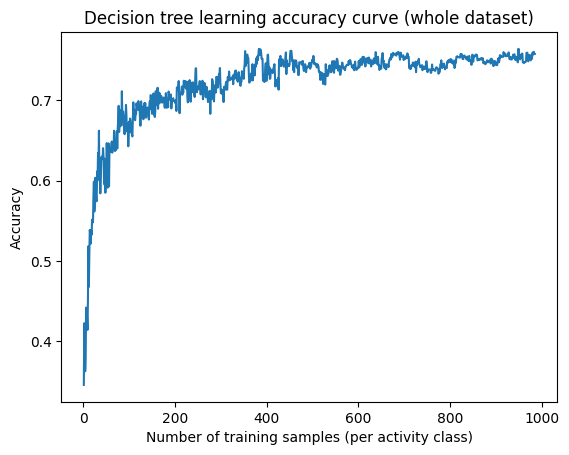

In [275]:
plt.plot(range(1, 986), big_tree_accarr)
plt.xlabel("Number of training samples (per activity class)")
plt.ylabel("Accuracy")
plt.title("Decision tree learning accuracy curve (whole dataset)")
plt.show()

###### It can therefore be seen that even if we use the whole training set and test on the whole testing set, the accuracy plateaus around 75%. This shows that reducing the number of dimensions had a detrimental effect on the accuracy. But this was uncompromisable measure, as without it, we would run out of our 1000000 tokens within a few test runs.

Q3. What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? [1 marks]

A3. One of the main limitations of using LLMs for tasks like these is the limited token size. Using an online tool, https://belladoreai.github.io/llama3-tokenizer-js/example-demo/build/, we found the number of tokens any of our queries took. We found that every query of few-shot learning, even using only 34 features, took around 25000 tokens each. The large number of tokens warrants models having a bigger context window, and larger processing capacity. This is one of the largest bottleneck to deploying LLMs for activity classification. The resources used would be too high. If, we instead use decision trees, the processing power required would be lower.
Additionally, LLMs have been trained to generate text data, and are not very good at number crunching. They might also lack domain knowledge required for understanding the significance of each label. Another problem is converting data in a tabular form to a query in a text form. The LLM might fail to link the data value to the feature name if the number of training samples provided is too high.

Q4. What does the model classify when given input from an entirely new activity that it hasn't seen before? [0.5 mark]

In [279]:
# Let us train the model only on three activities, and test it on two activities whose samples were not given.
train_df = pd.concat([train_list[0].sample(5, random_state=42), train_list[1].sample(5, random_state=42), train_list[3].sample(5, random_state=42)], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
test_df = pd.concat([test_list[2].sample(5, random_state=42), train_list[5].sample(5, random_state=42)], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
acc, preds = few_shot_predict(train_df, test_df)
print(acc)

0.0


In [285]:
print(train_df["Activity"].unique())
print(test_df["Activity"].unique())
print(preds)

['WALKING_UPSTAIRS' 'SITTING' 'WALKING']
['LAYING' 'WALKING_DOWNSTAIRS']
['WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING', 'SITTING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'SITTING']


It can be seen that the model predicts all test cases to originate only from those classes in the training set. This is because it does not know anything about the values the other activities can take, and it therefore plays safe.

Q5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results. [0.5 mark]

A5. Let us randomize the test data, keeping the train data same.
As the test data (the labels of which belong to classes independent of the training classes).

In [292]:
np.random.seed(120)
new_test_df = test_df[:]
for col in new_test_df.columns[:-1]:
    new_test_df[col] = np.random.uniform(-1, 1, len(new_test_df))
acc, preds = few_shot_predict(train_df, new_test_df)
print(acc)
print(preds)

0.1
['WALKING_UPSTAIRS', 'SITTING', 'WALKING', 'WALKING', 'WALKING_UPSTAIRS', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING_DOWNSTAIRS', 'SITTING']


In [294]:
np.random.seed(42)
new_test_df = test_df[:]
for col in new_test_df.columns[:-1]:
    new_test_df[col] = np.random.uniform(-1, 1, len(new_test_df))
acc, preds = few_shot_predict(train_df, new_test_df)
print(acc)
print(preds)

0.1
['WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS']


In [291]:
print(train_df["Activity"].unique())

['WALKING_UPSTAIRS' 'SITTING' 'WALKING']


It can therefore be seen that if random data was passed in the test dataset, the model was able to make predictions outside its training data, thus yielding a non zero accuracy. The activity "WALKING_DOWNSTAIRS" appeared on the test predictions even when it was not a part of the training dataset, thus giving a non zero accuracy. 

In [172]:
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Train the classifier
rf.fit(train_dataframeX, train_dataframeY)
# Make predictions on the test set
pred = rf.predict(test_dataframeX)
# Calculate the accuracy
print(accuracy_score(test_dataframeY, pred))


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9260264675941635


In [253]:
def chunkify(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = ((100*df[col]).to_numpy(dtype=int))
    return df

In [277]:
train_df = chunkify(make_train_df(train_list, n=25, seed=42).sample(frac=1, random_state=43).reset_index(drop=True))
test_df = chunkify(make_test_df(test_list, n=4, seed=42))
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* Provide a single label for the activity being performed by the person for every test case.
* Provide the answer in the form of a python list of activity labels. DO NOT say anything else.
* Feature names: {test_df.columns[:-1].to_list()}
Look at the following training data:
"""
for i in range(len(train_df)):
    query += f"* Train sample {i+1}: {train_df.iloc[i, :-1].values}\n"
    query += f"* Activity {i+1}: {train_df.iloc[i, -1]}\n"
query += "* Guess the activity label for the following test samples:\n"
query += f"* Feature names: {test_df.columns[:-1].to_list()}"
for i in range(len(test_df)):
    query += f"* Test sample {i+1}: {test_df.iloc[i, :-1].values}\n"
query += f"* Provide the answer in the form of a python list of activity labels. Remember, there should be {len(test_df)} activity labels in this list. DO NOT say anything else."
acc, predicted_activities = few_shot_predict(train_df, test_df)
print(f"Accuracy: {acc}")

Accuracy: 0.08333333333333333
